In [244]:
# Importando as bibliotecas 

import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelBinarizer
import patsy
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [245]:
data=pd.read_csv("housing.csv")

In [246]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [247]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


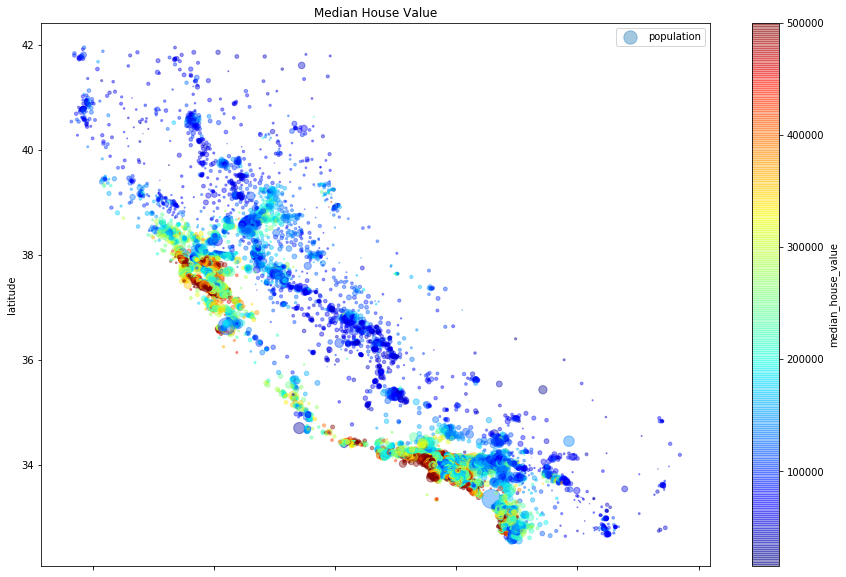

In [248]:
# plotando o gráfico da latitude e longitude 

data.plot(kind="scatter", x="longitude", y="latitude", title='Median House Value',
    s=data['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(15,10),
)
plt.legend()
plt.show()

In [249]:
# plotando o gráfico interativo 

fig = go.Figure(data=go.Scattergeo(
        lon = data['longitude'],
        lat = data['latitude'],
        text = data['median_house_value'],
        mode = 'markers',
        marker_color = data['median_house_value'],
        ))

fig.update_layout(
        title = 'Median House Value in California',
        geo_scope='usa')
    
fig.show()

In [250]:
# Os gráficos indicam que as casas mais próximas do oceano são mais caras 
pd.DataFrame(data.groupby(['ocean_proximity'])["median_house_value"].describe())

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


In [251]:
# Transformando ocean proximity em variaiveis dummies

dummies=LabelBinarizer().fit_transform(data['ocean_proximity'])
data=data.join(pd.DataFrame(dummies,columns=["<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]))

data.tail(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,0,1,0,0,0


In [252]:
# Removendo dados faltantes 

data=data.dropna()


In [253]:
data.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,0,1,0,0,0


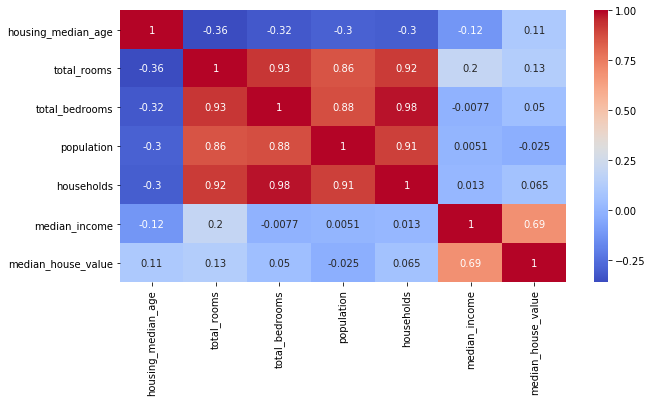

In [254]:
plt.figure(figsize=(10,5))
sns.heatmap(data[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]].corr(),
            cmap='coolwarm',
            annot=True);


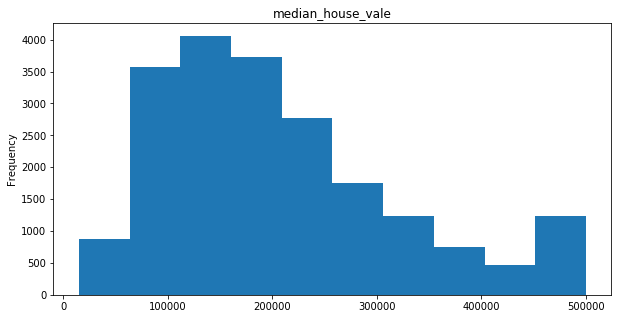

In [272]:
# Histograma de median_house_value

fig = plt.figure(figsize=(10, 5))


data.median_house_value.plot.hist(title='median_house_vale')

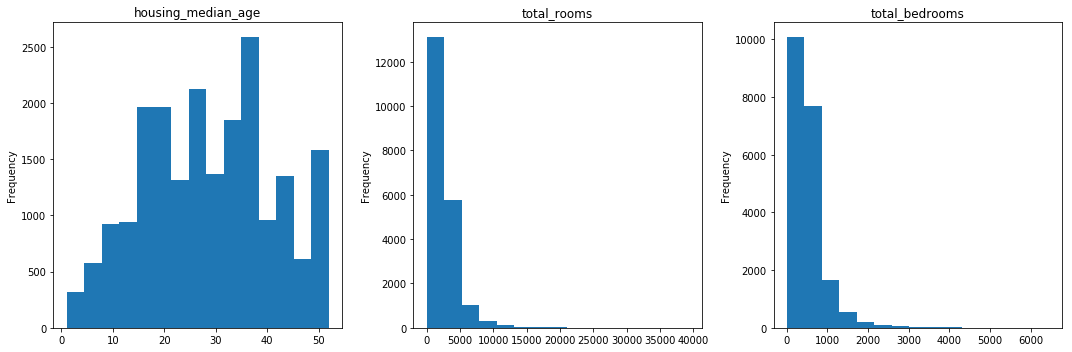

In [256]:
# Histograma das demais variáveis


fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = data.housing_median_age.plot.hist(bins=15, title='housing_median_age')

plt.subplot(132)
plot = data.total_rooms.plot.hist(bins=15, title='total_rooms')

plt.subplot(133)
plot = data.total_bedrooms.plot.hist(bins=15, title='total_bedrooms')

plt.tight_layout()
plt.show()



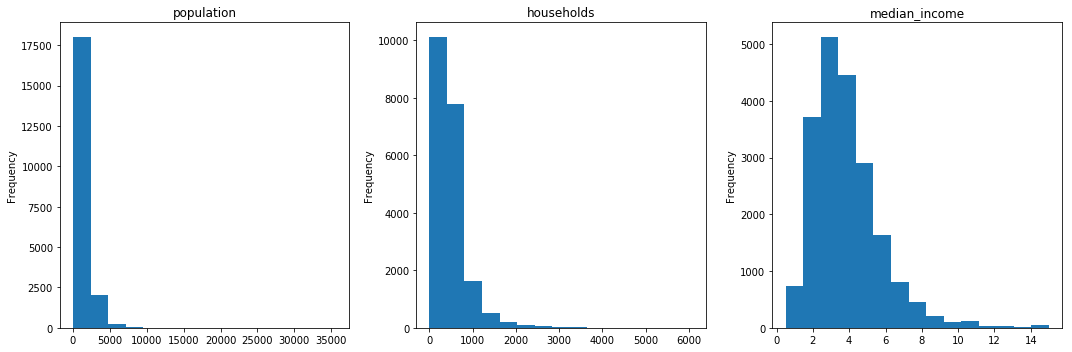

In [257]:
# Histograma das demais variáveis

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = data.population.plot.hist(bins=15, title='population')

plt.subplot(132)
plot = data.households.plot.hist(bins=15, title='households')

plt.subplot(133)
plot = data.median_income.plot.hist(bins=15, title='median_income')

plt.tight_layout()
plt.show()


In [258]:
data.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,0,1,0,0,0


In [259]:
# Regressão Linear 
# Separando o dataset 

from sklearn.model_selection import train_test_split

#Separando 20% dos dados para teste 
train, test = train_test_split(data, test_size=0.2)

#print(len(data))
#print(len(train))
#print(len(test))

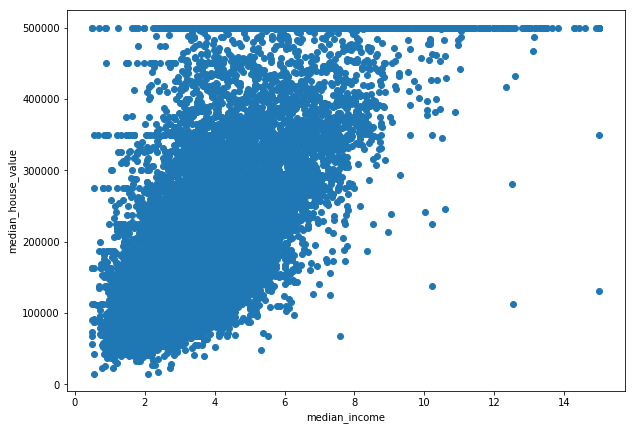

In [260]:
# Testando somente com um regressor (median_income)
y_train = train['median_house_value']
x_train = train["median_income"]

y_test = test['median_house_value']
x_test = test["median_income"]

fig = plt.figure(figsize=(10, 7))
plt.scatter(x_train,y_train)
plt.xlabel("median_income");
plt.ylabel("median_house_value");

In [261]:
# Testando o modelo somente com uma variável 

ols = sm.OLS(y_train, x_train).fit()

y_hat_ols = ols.predict(x_test)

RMSE_ols = np.sqrt(mean_squared_error(y_hat_ols, y_test))

print(np.round(RMSE_ols, 2))

ols.summary()

85210.1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.076e+05
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:00:51   Log-Likelihood:            -2.0897e+05
No. Observations:               16346   AIC:                         4.179e+05
Df Residuals:                   16345   BIC:                         4.179e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
median_income  5.138e+04    156.629    328.023      0.000    5.11e+04    5.17e+04
==============================================================================
Omnibus:                     2898.617   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7356.000
Skew:                           0.981   Prob(JB):                         0.00
Kurtosis:                       5.636   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
# Adicionando mais variáveis no modelo de regressão 

x_train_all = train.drop(["median_house_value","ocean_proximity"], axis=1)
x_test_all = test.drop(["median_house_value","ocean_proximity"], axis=1)


In [263]:
# Rodando o modelo de regressão com todas as variáveis 

ols = sm.OLS(y_train, x_train_all).fit()

y_hat_ols = ols.predict(x_test_all)

RMSE_ols = np.sqrt(mean_squared_error(y_hat_ols, y_test))

print(np.round(RMSE_ols, 2))

ols.summary()

68762.41


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2488.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:00:52   Log-Likelihood:            -2.0524e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2.735e+04   1134.149    -24.115      0.000   -2.96e+04   -2.51e+04
latitude           -2.597e+04   1117.816    -23.234      0.000   -2.82e+04   -2.38e+04
housing_median_age  1070.9576     49.118     21.804      0.000     974.681    1167.234
total_rooms           -6.1829      0.885     -6.989      0.000      -7.917      -4.449
total_bedrooms       100.6698      7.611     13.227      0.000      85.751     115.588
population           -41.7885      1.264    -33.063      0.000     -44.266     -39.311
households            57.3666      8.277      6.931      0.000      41.143      73.590
median_income       3.937e+04    381.477    103.201      0.000    3.86e+04    4.01e+04
<1H OCEAN          -2.315e+06   9.79e+04    -23.637      0.000   -2.51e+06   -2.12e+06
INLAND             -2.354e+06   9.68e+04    -24.320      0.000   -2.54e+06   -2.16e+06
ISLAND              -2.18e+06   1.05e+05    -20.848      0.000   -2.39e+06   -1.98e+06
NEAR BAY           -2.322e+06   9.84e+04    -23.590      0.000   -2.51e+06   -2.13e+06
NEAR OCEAN         -2.312e+06   9.83e+04    -23.511      0.000    -2.5e+06   -2.12e+06
==============================================================================
Omnibus:                     3599.926   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11094.524
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       6.342   Cond. No.                     1.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [267]:
# Selecionando somente algumas variáveis

x_train_set = train[["longitude","latitude","housing_median_age","total_rooms","median_income","<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]]
x_test_set = test[["longitude","latitude","housing_median_age","total_rooms","median_income","<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]]


In [268]:
# Rodando o modelo de regressão somente com algumas variáveis

ols = sm.OLS(y_train, x_train_set).fit()

y_hat_ols = ols.predict(x_test_set)

RMSE_ols = np.sqrt(mean_squared_error(y_hat_ols, y_test))

print(np.round(RMSE_ols, 2))

ols.summary()

70855.29


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2815.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:01:24   Log-Likelihood:            -2.0608e+05
No. Observations:               16346   AIC:                         4.122e+05
Df Residuals:                   16336   BIC:                         4.123e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2.487e+04   1173.688    -21.188      0.000   -2.72e+04   -2.26e+04
latitude           -2.316e+04   1156.922    -20.016      0.000   -2.54e+04   -2.09e+04
housing_median_age  1040.4062     51.573     20.174      0.000     939.318    1141.495
total_rooms            3.1648      0.280     11.316      0.000       2.617       3.713
median_income        3.69e+04    321.043    114.948      0.000    3.63e+04    3.75e+04
<1H OCEAN          -2.109e+06   1.01e+05    -20.784      0.000   -2.31e+06   -1.91e+06
INLAND             -2.154e+06      1e+05    -21.490      0.000   -2.35e+06   -1.96e+06
ISLAND             -1.956e+06   1.08e+05    -18.049      0.000   -2.17e+06   -1.74e+06
NEAR BAY           -2.109e+06   1.02e+05    -20.680      0.000   -2.31e+06   -1.91e+06
NEAR OCEAN           -2.1e+06   1.02e+05    -20.618      0.000    -2.3e+06    -1.9e+06
==============================================================================
Omnibus:                     3849.639   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10471.744
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       6.010   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
# Random Forest

In [270]:
# Ranfom Forest com todas as variáveis 

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

rf.fit(x_train_all, np.ravel(y_train))

y_hat_rf = rf.predict(x_test_all)

RMSE_rf = np.sqrt(mean_squared_error(y_hat_rf, np.ravel(y_test)))

np.round(RMSE_rf, 2)

48464.7

In [271]:
# Ranfom Forest com algumas variáveis 

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

rf.fit(x_train_set, np.ravel(y_train))

y_hat_rf = rf.predict(x_test_set)

RMSE_rf = np.sqrt(mean_squared_error(y_hat_rf, np.ravel(y_test)))

np.round(RMSE_rf, 2)

48456.08